In [1]:
pip install openpyxl


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
 pip install dask

   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   -------- ------------------------------- 0.3/1.2 MB ? eta -:--:--
   ---------------- ----------------------- 0.5/1.2 MB 1.1 MB/s eta 0:00:01
   ---------------- ----------------------- 0.5/1.2 MB 1.1 MB/s eta 0:00:01
   ---------------- ----------------------- 0.5/1.2 MB 1.1 MB/s eta 0:00:01
   ------------------------- -------------- 0.8/1.2 MB 645.7 kB/s eta 0:00:01
   ------------------------- -------------- 0.8/1.2 MB 645.7 kB/s eta 0:00:01
   ------------------------- -------------- 0.8/1.2 MB 645.7 kB/s eta 0:00:01
   ------------------------- -------------- 0.8/1.2 MB 645.7 kB/s eta 0:00:01
   ------------------------- -------------- 0.8/1.2 MB 645.7 kB/s eta 0:00:01
   ------------------------- -------------- 0.8/1.2 MB 645.7 kB/s eta 0:00:01
   --------------------------------- ------ 1.0/1.2 MB 387.2 kB/s eta 0:00:01
   --------------------------------- ------ 1.0/1.2 MB 387.2 kB/s eta 0:00:01
   -------


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install statsmodels


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from scipy import stats

In [8]:
# importamos datos
dataset2 = 'c:/Users/Zamora Thowinsson/iCloudDrive/Documents/3_Maestria_Estadistica_UNINORTE/3_Tercer_Semestre/Serie de Tiempo/Trabajo_final/dataset2.xlsx'
data= pd.read_excel(dataset2)
print(data.head())

  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom  


In [9]:

ruta = r'c:/Users/Zamora Thowinsson/iCloudDrive/Documents/3_Maestria_Estadistica_UNINORTE/3_Tercer_Semestre/Serie de Tiempo/Trabajo_final/dataset2.xlsx'

# Cargar todas las hojas en un diccionario
dataset2 = pd.read_excel(ruta, sheet_name=None)

# Ver los nombres de las hojas
print(dataset2.keys())  # Muestra los nombres de las hojas disponibles


dict_keys(['Year 2009-2010', 'Year 2010-2011'])


In [10]:
# Concatenar todas las hojas en un solo DataFrame
df_completo = pd.concat(dataset2.values(), ignore_index=True)

# Mostrar las primeras filas
print(df_completo.head())


  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom  


In [12]:
# Número de filas y columnas
filas, columnas = df_completo.shape
print(f"El DataFrame tiene {filas} filas y {columnas} columnas.")

# Número total de datos (celdas)
total_datos = df_completo.size
print(f"El DataFrame contiene un total de {total_datos} datos (celdas).")
data = df_completo


El DataFrame tiene 1067371 filas y 8 columnas.
El DataFrame contiene un total de 8538968 datos (celdas).


ANALISIS PRELIMINAR

In [13]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 65.1+ MB


In [14]:
# Identificar valores nulos en cada DataFrame
print("/nValores nulos en online retail:")
print(data.isnull().sum())


/nValores nulos en online retail:
Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64


In [15]:
# Estadística descriptiva
estadisticas_descriptivas = data.describe()
print(estadisticas_descriptivas)

           Quantity                    InvoiceDate         Price  \
count  1.067371e+06                        1067371  1.067371e+06   
mean   9.938898e+00  2011-01-02 21:13:55.394028544  4.649388e+00   
min   -8.099500e+04            2009-12-01 07:45:00 -5.359436e+04   
25%    1.000000e+00            2010-07-09 09:46:00  1.250000e+00   
50%    3.000000e+00            2010-12-07 15:28:00  2.100000e+00   
75%    1.000000e+01            2011-07-22 10:23:00  4.150000e+00   
max    8.099500e+04            2011-12-09 12:50:00  3.897000e+04   
std    1.727058e+02                            NaN  1.235531e+02   

         Customer ID  
count  824364.000000  
mean    15324.638504  
min     12346.000000  
25%     13975.000000  
50%     15255.000000  
75%     16797.000000  
max     18287.000000  
std      1697.464450  


VISUALIZACIÓN DE LA SERIE

In [16]:
# Asegúrate de que 'DATE_TIME' esté en formato datetime
data['DATE_TIME'] = pd.to_datetime(data['InvoiceDate'])

In [17]:
import pandas as pd

# Suponiendo que df_completo ya contiene la columna 'InvoiceDate' y 'Quantity'

# Asegurarse de que la columna 'InvoiceDate' sea de tipo datetime
df_completo['InvoiceDate'] = pd.to_datetime(df_completo['InvoiceDate'])

# Crear una nueva columna 'Month' que contenga el mes correspondiente a cada transacción
df_completo['Month'] = df_completo['InvoiceDate'].dt.to_period('M')

# Calcular el acumulado de 'Quantity' por mes
df_completo['Cumulative_Quantity'] = df_completo.groupby('Month')['Quantity'].cumsum()

# Mostrar el DataFrame con el acumulado mensual
print(df_completo)


        Invoice StockCode                          Description  Quantity  \
0        489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1        489434    79323P                   PINK CHERRY LIGHTS        12   
2        489434    79323W                  WHITE CHERRY LIGHTS        12   
3        489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4        489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
...         ...       ...                                  ...       ...   
1067366  581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
1067367  581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
1067368  581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
1067369  581587     22138        BAKING SET 9 PIECE RETROSPOT          3   
1067370  581587      POST                              POSTAGE         1   

                InvoiceDate  Price  Customer ID         Country  \
0       2009-12-01 0

In [18]:
# Creando tabla de fecha díaria y promedio diario de velocidad del viento
df_daily_avg= data.groupby(data['DATE_TIME'].dt.to_period('D'))['Quantity'].mean().reset_index()
df_daily_avg1= data.groupby(data['DATE_TIME'].dt.to_period('D'))['Price'].mean().reset_index()
# Agrupar por semana y calcular el promedio de 'Quantity' y 'Price'
df_weekly_avg = data.groupby(data['DATE_TIME'].dt.to_period('W'))['Quantity'].mean().reset_index()
df_weekly_avg1 = data.groupby(data['DATE_TIME'].dt.to_period('W'))['Price'].mean().reset_index()
# Agrupar por mes y calcular el promedio de 'Quantity' y 'Price'
df_monthly_avg = data.groupby(data['DATE_TIME'].dt.to_period('M'))['Quantity'].mean().reset_index()
df_monthly_avg1 = data.groupby(data['DATE_TIME'].dt.to_period('M'))['Price'].mean().reset_index()
# Agrupar por año y calcular el promedio de 'Quantity' y 'Price'
df_yearly_avg = data.groupby(data['DATE_TIME'].dt.to_period('A'))['Quantity'].mean().reset_index()
df_yearly_avg1 = data.groupby(data['DATE_TIME'].dt.to_period('A'))['Price'].mean().reset_index()


C:\Users\Zamora Thowinsson\AppData\Local\Temp\ipykernel_45964\637406707.py:11: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'Y' instead.
  df_yearly_avg = data.groupby(data['DATE_TIME'].dt.to_period('A'))['Quantity'].mean().reset_index()
C:\Users\Zamora Thowinsson\AppData\Local\Temp\ipykernel_45964\637406707.py:12: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'Y' instead.
  df_yearly_avg1 = data.groupby(data['DATE_TIME'].dt.to_period('A'))['Price'].mean().reset_index()


In [19]:
df_monthly_avg.head()



,DATE_TIME,Quantity
0,2009-12,9.288229
1,2010-01,11.895516
2,2010-02,12.535797
3,2010-03,11.788923
4,2010-04,10.334762


In [20]:
df_daily_avg1.head()

,DATE_TIME,Price
0,2009-12-01,4.483568
1,2009-12-02,4.092756
2,2009-12-03,4.427132
3,2009-12-04,3.785572
4,2009-12-05,3.590199


In [21]:
print(data.dtypes)
for col in data.select_dtypes(include=['object']).columns:
    print(f"Unique values in {col}:", data[col].unique()[:10])  # Show first 10 unique values
for col in data.columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')  # Convert text to NaN


Invoice                        object
StockCode                      object
Description                    object
Quantity                        int64
InvoiceDate            datetime64[ns]
Price                         float64
Customer ID                   float64
Country                        object
DATE_TIME              datetime64[ns]
Month                       period[M]
Cumulative_Quantity             int64
dtype: object
Unique values in Invoice: [489434 489435 489436 489437 489438 489439 489440 489441 489442 489443]
Unique values in StockCode: [85048 '79323P' '79323W' 22041 21232 22064 21871 21523 22350 22349]
Unique values in Description: ['15CM CHRISTMAS GLASS BALL 20 LIGHTS' 'PINK CHERRY LIGHTS'
 ' WHITE CHERRY LIGHTS' 'RECORD FRAME 7" SINGLE SIZE '
 'STRAWBERRY CERAMIC TRINKET BOX' 'PINK DOUGHNUT TRINKET POT '
 'SAVE THE PLANET MUG' 'FANCY FONT HOME SWEET HOME DOORMAT' 'CAT BOWL '
 'DOG BOWL , CHASING BALL DESIGN']
Unique values in Country: ['United Kingdom' 'France' 'USA' 

In [22]:
# Agrupando por fecha diaria y calculando los promedios
df_daily_avg_quantity = data.groupby(data['DATE_TIME'].dt.to_period('D'))['Quantity'].mean().reset_index()
df_daily_avg_price = data.groupby(data['DATE_TIME'].dt.to_period('D'))['Price'].mean().reset_index()

# Convertir la columna 'DATE_TIME' de Period a datetime
df_daily_avg_quantity['DATE_TIME'] = df_daily_avg_quantity['DATE_TIME'].dt.start_time
df_daily_avg_price['DATE_TIME'] = df_daily_avg_price['DATE_TIME'].dt.start_time


AttributeError: Can only use .dt accessor with datetimelike values

Text(0, 0.5, 'Price')

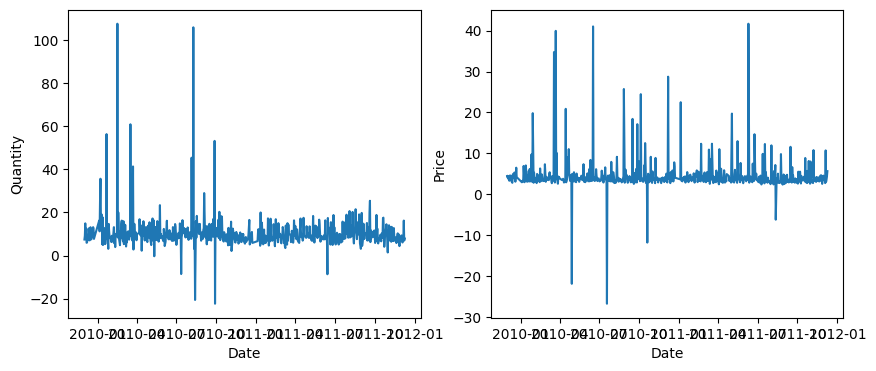

In [68]:
# Creo una figura con 1 fila y 2 columnas
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Gráfica de línea 1
axes[0].plot(df_daily_avg_quantity['DATE_TIME'],df_daily_avg_quantity['Quantity'])
axes[0].set_xlabel("Date")
axes[0].set_ylabel("Quantity")

# Gráfica de línea 2

# Gráfica de velocidad del viento por día
axes[1].plot(df_daily_avg_price['DATE_TIME'], df_daily_avg_price['Price'])
axes[1].set_xlabel("Date")
axes[1].set_ylabel("Price")


In [48]:
# Filtrar solo los valores no negativos de 'Quantity' en df_daily_avg_quantity
df_daily_avg_quantity = df_daily_avg_quantity[df_daily_avg_quantity['Quantity'] >= 0]

# Filtrar solo los valores no negativos de 'Price' en df_daily_avg_price
df_daily_avg_price = df_daily_avg_price[df_daily_avg_price['Price'] >= 0]

# Mostrar los primeros registros para verificar
df_daily_avg_quantity.head(), df_daily_avg_price.head()


(   DATE_TIME   Quantity
 0 2009-12-01   7.453304
 1 2009-12-02   9.137016
 2 2009-12-03  14.955363
 3 2009-12-04   8.206721
 4 2009-12-05  12.519900,
    DATE_TIME     Price
 0 2009-12-01  4.483568
 1 2009-12-02  4.092756
 2 2009-12-03  4.427132
 3 2009-12-04  3.785572
 4 2009-12-05  3.590199)

Text(0, 0.5, 'Price')

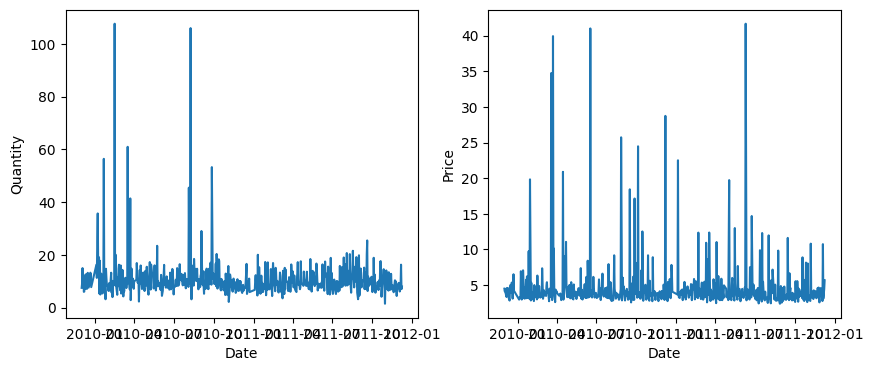

In [49]:
# Creo una figura con 1 fila y 2 columnas
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Gráfica de línea 1
axes[0].plot(df_daily_avg_quantity['DATE_TIME'], df_daily_avg_quantity['Quantity'])
axes[0].set_xlabel("Date")
axes[0].set_ylabel("Quantity")

# Gráfica de línea 2

# Gráfica de velocidad del viento por día
axes[1].plot(df_daily_avg_price ['DATE_TIME'], df_daily_avg_price ['Price'])
axes[1].set_xlabel("Date")
axes[1].set_ylabel("Price")

In [29]:
# Asegúrate de que 'DATE_TIME' esté en formato datetime
data['DATE_TIME'] = pd.to_datetime(data['DATE_TIME'], errors='coerce')
# Ahora puedes usar .dt accessor
df_daily_avg_quantity = data.groupby(data['DATE_TIME'].dt.to_period('D'))['Quantity'].mean().reset_index()
df_daily_avg_price = data.groupby(data['DATE_TIME'].dt.to_period('D'))['Price'].mean().reset_index()
# Convertir Period a datetime
df_daily_avg_quantity['DATE_TIME'] = df_daily_avg_quantity['DATE_TIME'].dt.start_time
df_daily_avg_price['DATE_TIME'] = df_daily_avg_price['DATE_TIME'].dt.start_time
import pandas as pd

# Asegúrate de que 'DATE_TIME' esté en formato datetime
data['DATE_TIME'] = pd.to_datetime(data['DATE_TIME'], errors='coerce')

# Extraer la semana, mes y año
df_weekly_avg= data['DATE_TIME'].dt.isocalendar().week  # Cambio aquí
df_monthly_avg= data['DATE_TIME'].dt.month
df_yearly_avg['Año'] = data['DATE_TIME'].dt.year

# Agrupar por fecha diaria y calcular promedios
df_daily_avg_quantity = data.groupby(data['DATE_TIME'].dt.to_period('D'))['Quantity'].mean().reset_index()
df_daily_avg_price = data.groupby(data['DATE_TIME'].dt.to_period('D'))['Price'].mean().reset_index()

# Convertir Period a datetime
df_daily_avg_quantity['DATE_TIME'] = df_daily_avg_quantity['DATE_TIME'].dt.start_time
df_daily_avg_price['DATE_TIME'] = df_daily_avg_price['DATE_TIME'].dt.start_time

# Si quieres agregar la semana, mes y año al DataFrame de promedios, puedes hacerlo como sigue:
df_daily_avg_quantityW = df_daily_avg_quantity['DATE_TIME'].dt.isocalendar().week  # Cambio aquí
df_monthly_avg = df_daily_avg_quantity['DATE_TIME'].dt.month
df_daily_avg_quantityY = df_daily_avg_quantity['DATE_TIME'].dt.year

print(df_monthly_avg)


0      12
1      12
2      12
3      12
4      12
       ..
599    12
600    12
601    12
602    12
603    12
Name: DATE_TIME, Length: 604, dtype: int32


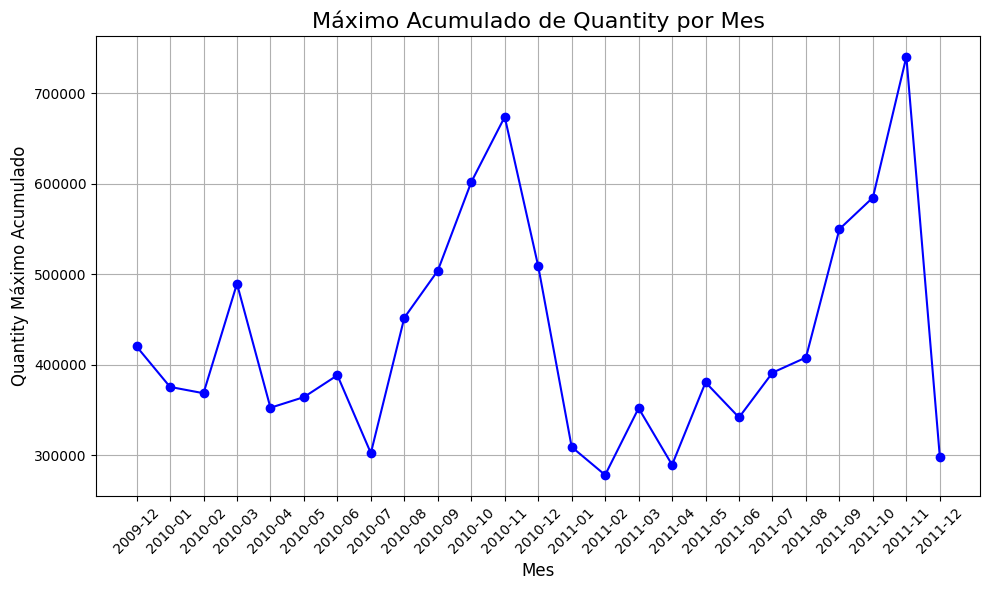

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Suponiendo que df_completo ya contiene las columnas 'InvoiceDate', 'Quantity', y 'Month'

# Asegurarse de que la columna 'InvoiceDate' sea de tipo datetime
df_completo['InvoiceDate'] = pd.to_datetime(df_completo['InvoiceDate'])

# Crear una nueva columna 'Month' que contenga el mes correspondiente a cada transacción
df_completo['Month'] = df_completo['InvoiceDate'].dt.to_period('M')

# Calcular el acumulado de 'Quantity' por mes
df_completo['Cumulative_Quantity'] = df_completo.groupby('Month')['Quantity'].cumsum()

# Agrupar por mes y obtener el valor máximo acumulado de 'Quantity' por mes
df_monthly_max = df_completo.groupby('Month')['Cumulative_Quantity'].max().reset_index()

# Graficar el máximo acumulado de 'Quantity' por mes
plt.figure(figsize=(10, 6))
plt.plot(df_monthly_max['Month'].astype(str), df_monthly_max['Cumulative_Quantity'], marker='o', linestyle='-', color='b')
plt.title('Máximo Acumulado de Quantity por Mes', fontsize=16)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Quantity Máximo Acumulado', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


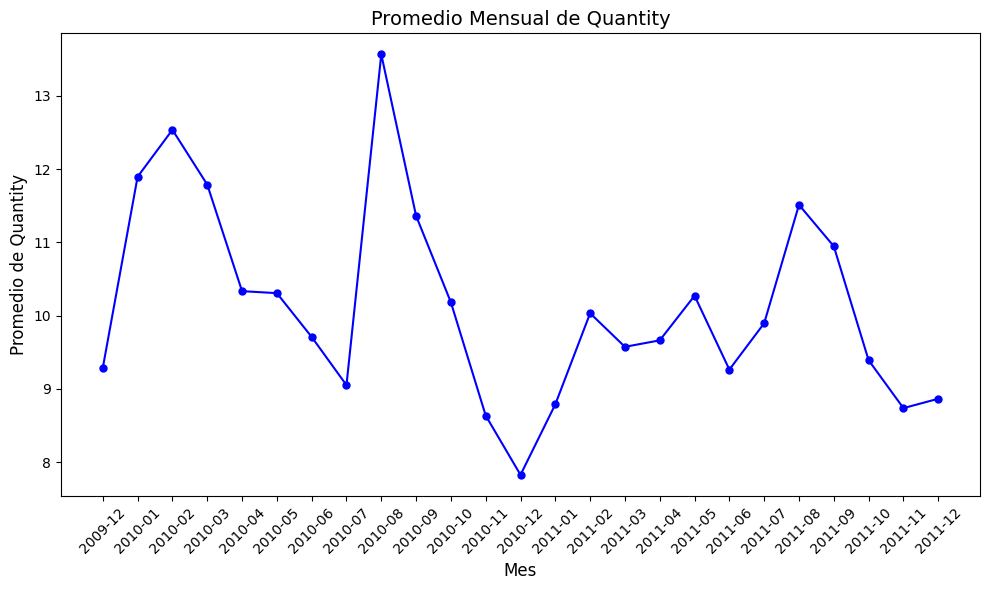

In [28]:
import matplotlib.pyplot as plt

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(df_monthly_avg['DATE_TIME'].astype(str), df_monthly_avg['Quantity'], marker='o', color='b', linestyle='-', markersize=5)

# Etiquetas y título
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Promedio de Quantity', fontsize=12)
plt.title('Promedio Mensual de Quantity', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar gráfico
plt.show()





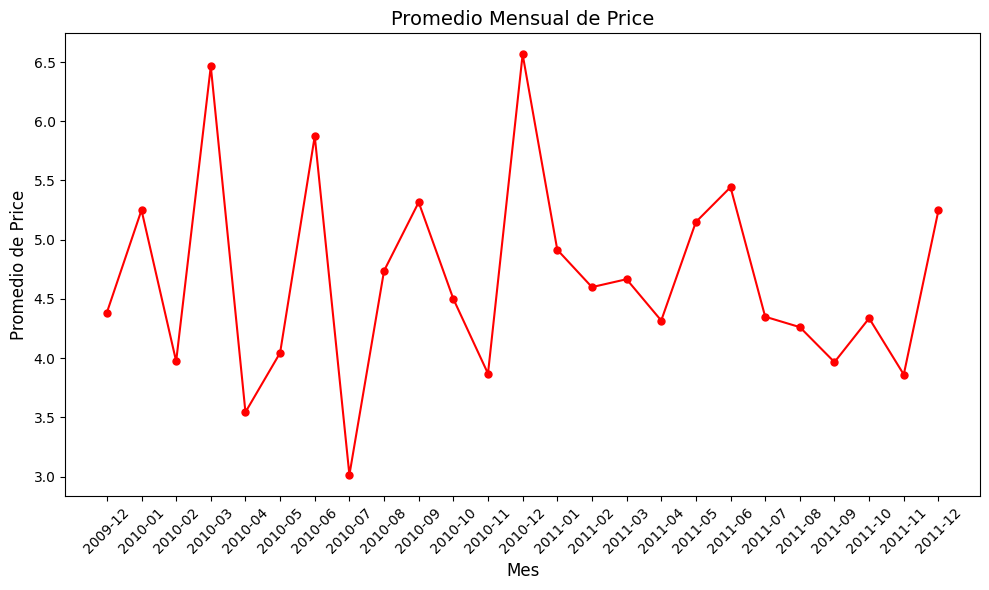

In [100]:
import matplotlib.pyplot as plt

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(df_monthly_avg1['DATE_TIME'].astype(str), df_monthly_avg1['Price'], marker='o', color='r', linestyle='-', markersize=5)

# Etiquetas y título
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Promedio de Price', fontsize=12)
plt.title('Promedio Mensual de Price', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar gráfico
plt.show()




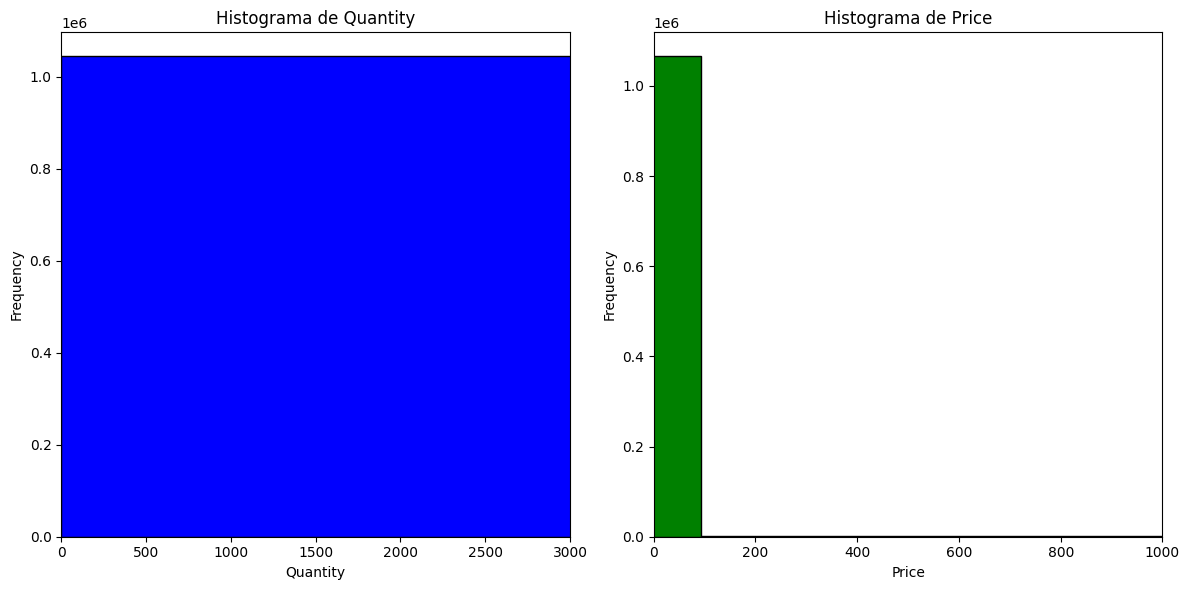

In [23]:
import matplotlib.pyplot as plt

# Crear histogramas de 'Quantity' y 'Price' en una sola figura con 1 fila y 2 columnas
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Histograma de 'Quantity'
axes[0].hist(df_completo['Quantity'], bins=30, color='b', edgecolor='black')
axes[0].set_xlabel("Quantity")
axes[0].set_ylabel("Frequency")
axes[0].set_title("Histograma de Quantity")

# Limitar el eje X del histograma de 'Quantity' entre 0 y 100
axes[0].set_xlim([0, 3000])

# Histograma de 'Price'
axes[1].hist(df_completo['Price'], bins=50, color='g', edgecolor='black')
axes[1].set_xlabel("Price")
axes[1].set_ylabel("Frequency")
axes[1].set_title("Histograma de Price")

# Limitar el eje X del histograma de 'Price' entre 0 y 100
axes[1].set_xlim([0, 1000])

# Ajustar el espaciado entre las gráficas
plt.tight_layout()

# Mostrar los histogramas
plt.show()


C:\Users\wmanj\AppData\Local\Temp\ipykernel_10620\1458255818.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2010['Month'] = data_2010['DATE_TIME'].dt.month


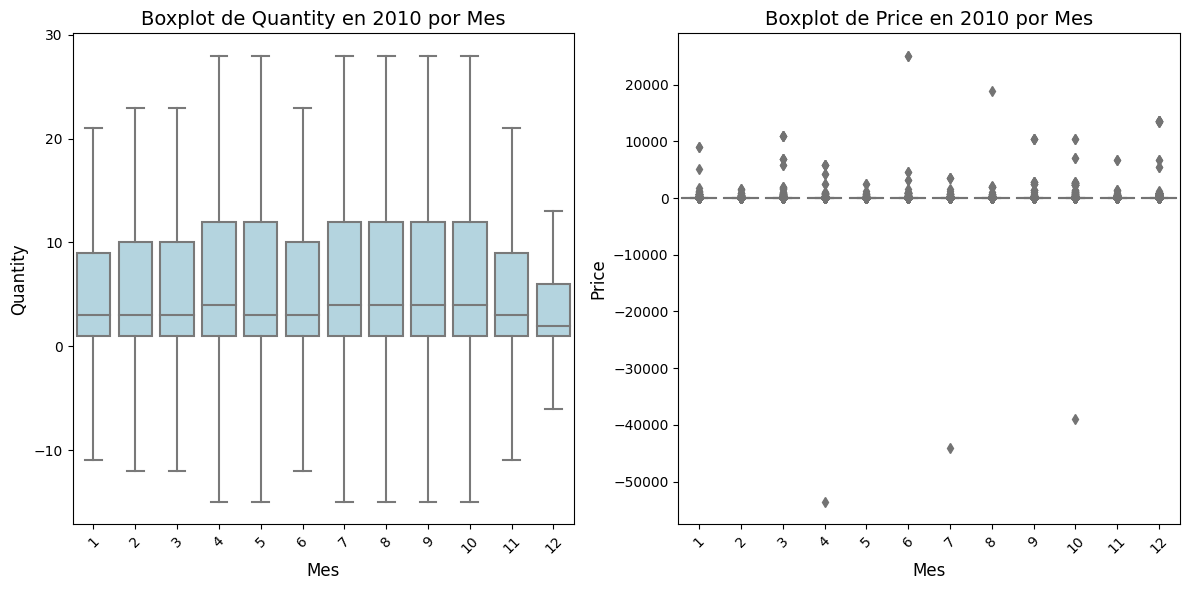

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Asegurarse de que 'DATE_TIME' esté en formato datetime
df_completo['DATE_TIME'] = pd.to_datetime(df_completo['DATE_TIME'], errors='coerce')

# Filtrar los datos para el año 2010
data_2010 = df_completo[df_completo['DATE_TIME'].dt.year == 2010]

# Extraer el mes de la columna 'DATE_TIME'
data_2010['Month'] = data_2010['DATE_TIME'].dt.month

# Crear una figura con 1 fila y 2 columnas
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Gráfica de caja y bigote para 'Quantity' en 2010
sns.boxplot(x=data_2010['Month'], y=data_2010['Quantity'], ax=axes[0], color='lightblue', showfliers=False)
axes[0].set_xlabel("Mes", fontsize=12)
axes[0].set_ylabel("Quantity", fontsize=12)
axes[0].set_title("Boxplot de Quantity en 2010 por Mes", fontsize=14)
axes[0].tick_params(axis='x', rotation=45)

# Gráfica de caja y bigote para 'Price' en 2010
sns.boxplot(x=data_2010['Month'], y=data_2010['Price'], ax=axes[1], color='lightgreen', showfliers=True)
axes[1].set_xlabel("Mes", fontsize=12)
axes[1].set_ylabel("Price", fontsize=12)
axes[1].set_title("Boxplot de Price en 2010 por Mes", fontsize=14)
axes[1].tick_params(axis='x', rotation=45)

# Ajustar el espaciado entre las gráficas
plt.tight_layout()

# Mostrar las gráficas
plt.show()


C:\Users\wmanj\AppData\Local\Temp\ipykernel_10620\4147525504.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2011['Month'] = data_2011['DATE_TIME'].dt.month


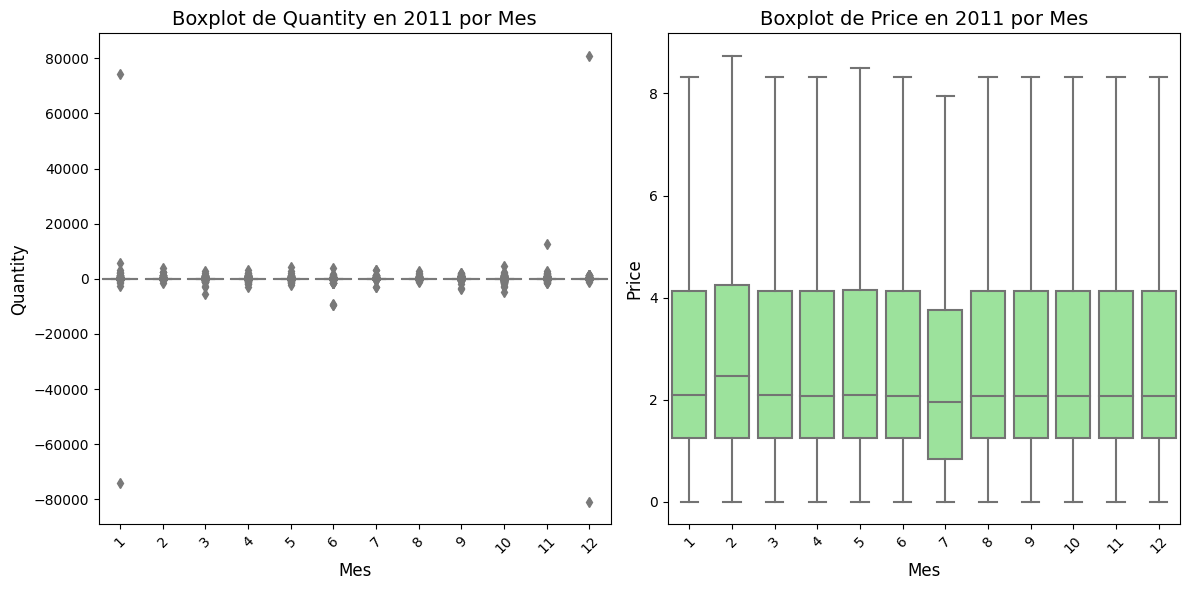

In [27]:
# Filtrar los datos para el año 2011
data_2011 = df_completo[df_completo['DATE_TIME'].dt.year == 2011]

# Extraer el mes de la columna 'DATE_TIME'
data_2011['Month'] = data_2011['DATE_TIME'].dt.month

# Crear una figura con 1 fila y 2 columnas
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Gráfica de caja y bigote para 'Quantity' en 2011
sns.boxplot(x=data_2011['Month'], y=data_2011['Quantity'], ax=axes[0], color='lightblue', showfliers=True)
axes[0].set_xlabel("Mes", fontsize=12)
axes[0].set_ylabel("Quantity", fontsize=12)
axes[0].set_title("Boxplot de Quantity en 2011 por Mes", fontsize=14)
axes[0].tick_params(axis='x', rotation=45)

# Gráfica de caja y bigote para 'Price' en 2011
sns.boxplot(x=data_2011['Month'], y=data_2011['Price'], ax=axes[1], color='lightgreen', showfliers=False)
axes[1].set_xlabel("Mes", fontsize=12)
axes[1].set_ylabel("Price", fontsize=12)
axes[1].set_title("Boxplot de Price en 2011 por Mes", fontsize=14)
axes[1].tick_params(axis='x', rotation=45)

# Ajustar el espaciado entre las gráficas
plt.tight_layout()

# Mostrar las gráficas
plt.show()


In [234]:
# Asegúrate de que 'Product' y 'Quantity' son las columnas correctas
# Agrupar por producto y obtener la suma de la cantidad vendida y el precio promedio
top_20_products = df_completo.groupby('Description').agg({'Quantity': 'sum', 'Price': 'mean'}).reset_index()

# Ordenar los productos por cantidad de ventas de mayor a menor
top_20_products = top_20_products.sort_values(by='Quantity', ascending=False).head(20)

# Mostrar el top 20 de productos más vendidos con su precio promedio
print(top_20_products)



                              Description  Quantity     Price
5305    WORLD WAR 2 GLIDERS ASSTD DESIGNS    110249  0.282919
5184   WHITE HANGING HEART T-LIGHT HOLDER     96688  3.132172
307         ASSORTED COLOUR BIRD ORNAMENT     81817  1.855104
3205          PAPER CRAFT , LITTLE BIRDIE     80995  2.080000
2455              JUMBO BAG RED RETROSPOT     79285  2.383110
2765       MEDIUM CERAMIC TOP STORAGE JAR     78033  1.468480
776                   BROCADE RING PURSE      71440  0.302201
3141   PACK OF 60 PINK PAISLEY CAKE CASES     56794  0.711744
161           60 TEATIME FAIRY CAKE CASES     54716  0.664032
4634                 SMALL POPCORN HOLDER     49984  1.036660
3144      PACK OF 72 RETROSPOT CAKE CASES     49805  0.738653
3143     PACK OF 72 RETRO SPOT CAKE CASES     46755  0.664245
319             ASSORTED COLOURS SILK FAN     44485  0.992241
2830              MINI PAINT SET VINTAGE      44405  0.772709
1142  COLOUR GLASS T-LIGHT HOLDER HANGING     40839  0.825169
4980    

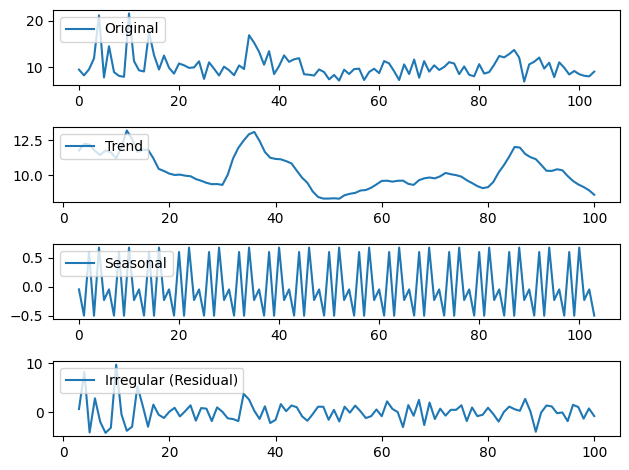

In [88]:
# Descomposición de la serie por semana
decomposition = seasonal_decompose( df_weekly_avg['Quantity'], model='additive', period=6)

plt.figure()
plt.subplot(411)
plt.plot(df_weekly_avg['Quantity'], label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(decomposition.resid, label='Irregular (Residual)')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

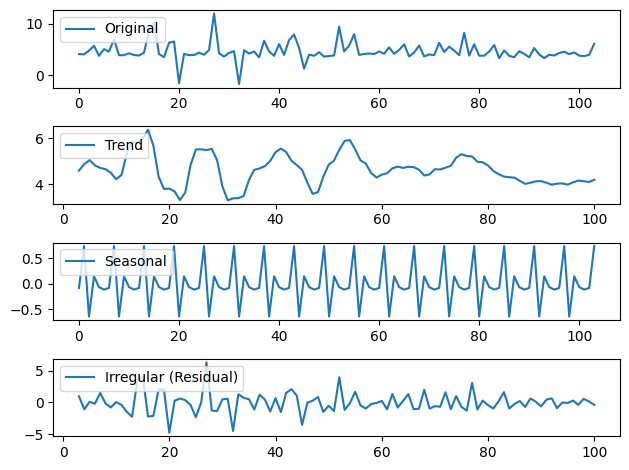

In [89]:
# Descomposición de la serie por semana
decomposition = seasonal_decompose( df_weekly_avg1['Price'], model='additive', period=6)

plt.figure()
plt.subplot(411)
plt.plot(df_weekly_avg1['Price'], label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(decomposition.resid, label='Irregular (Residual)')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

Gráficas de Autocorrelación

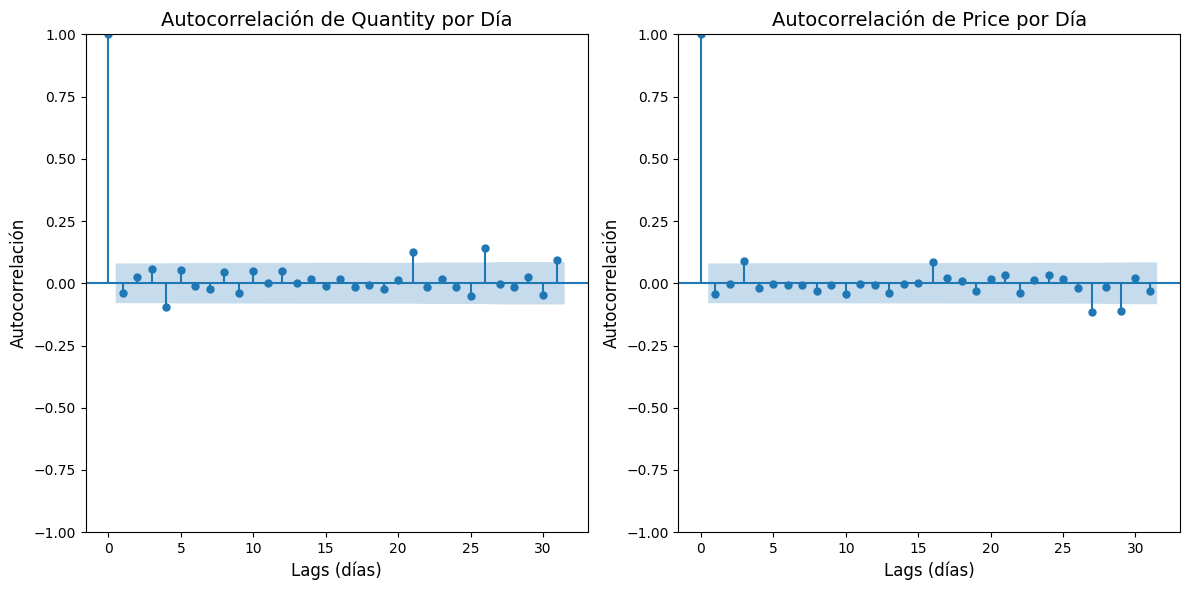

In [90]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Crear una figura con 1 fila y 2 columnas
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Gráfica de autocorrelación para 'Quantity' (por día)
plot_acf(df_daily_avg['Quantity'], lags=31, ax=axes[0])
axes[0].set_title("Autocorrelación de Quantity por Día", fontsize=14)
axes[0].set_xlabel("Lags (días)", fontsize=12)
axes[0].set_ylabel("Autocorrelación", fontsize=12)

# Gráfica de autocorrelación para 'Price' (por día)
plot_acf(df_daily_avg1['Price'], lags=31, ax=axes[1])
axes[1].set_title("Autocorrelación de Price por Día", fontsize=14)
axes[1].set_xlabel("Lags (días)", fontsize=12)
axes[1].set_ylabel("Autocorrelación", fontsize=12)

# Ajustar el espaciado entre las gráficas
plt.tight_layout()

# Mostrar ambas gráficas
plt.show()


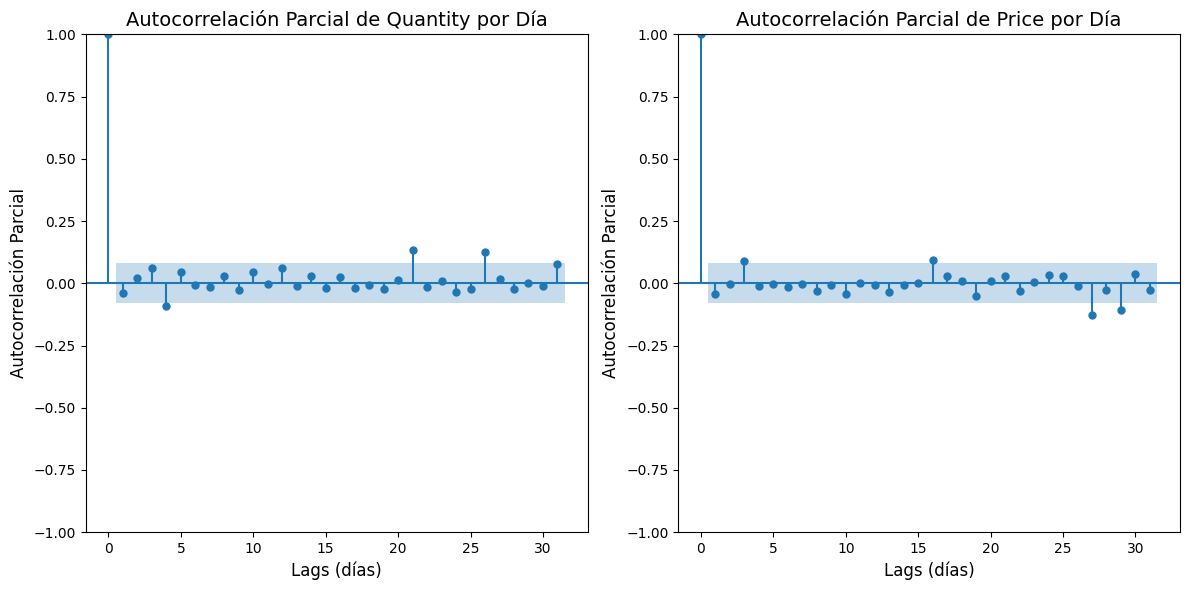

In [91]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf

# Crear una figura con 1 fila y 2 columnas
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Gráfica de autocorrelación parcial para 'Quantity' (por día)
plot_pacf(df_daily_avg['Quantity'], lags=31, ax=axes[0])
axes[0].set_title("Autocorrelación Parcial de Quantity por Día", fontsize=14)
axes[0].set_xlabel("Lags (días)", fontsize=12)
axes[0].set_ylabel("Autocorrelación Parcial", fontsize=12)

# Gráfica de autocorrelación parcial para 'Price' (por día)
plot_pacf(df_daily_avg1['Price'], lags=31, ax=axes[1])
axes[1].set_title("Autocorrelación Parcial de Price por Día", fontsize=14)
axes[1].set_xlabel("Lags (días)", fontsize=12)
axes[1].set_ylabel("Autocorrelación Parcial", fontsize=12)

# Ajustar el espaciado entre las gráficas
plt.tight_layout()

# Mostrar ambas gráficas
plt.show()


Análisis de estacionariedad - pruebas estadisticas

In [23]:
import numpy as np
array = np.empty((70, 1067248), dtype=np.float32)  # Usa menos memoria

from statsmodels.tsa.stattools import adfuller

# Asegúrate de que 'data' es un DataFrame y 'ValorObservado' es una columna de serie temporal
adf_result = adfuller(df_completo['Quantity'], autolag='AIC')

# Muestra los resultados
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])



MemoryError: Unable to allocate 562. MiB for an array with shape (69, 1067248) and data type float64

In [105]:
# Prueba de KPSS
kpss_result = kpss(df_completo['Quantity'], regression='c', nlags="auto")
# Print the results
print("KPSS Statistic:", kpss_result[0])
print("p-value:", kpss_result[1])
print("Critical Values:", kpss_result[3])

kpss_result1 = kpss(df_completo['Price'], regression='c', nlags="auto")
# Print the results
print("KPSS StatisticP:", kpss_result1[0])
print("p-valueP:", kpss_result1[1])
print("Critical ValuesP:", kpss_result1[3])


KPSS Statistic: 0.8014871726995836
p-value: 0.01
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
KPSS StatisticP: 1.5093020290028574
p-valueP: 0.01
Critical ValuesP: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


C:\Users\wmanj\AppData\Local\Temp\ipykernel_12692\1955567220.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(df_completo['Quantity'], regression='c', nlags="auto")
C:\Users\wmanj\AppData\Local\Temp\ipykernel_12692\1955567220.py:8: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result1 = kpss(df_completo['Price'], regression='c', nlags="auto")


Pruebas de normalidad

In [107]:
print('Kolmogorov-Smirnov:')
stat, p = stats.kstest(df_completo['Quantity'], stats.norm.cdf)
print('Statistics=%.6f, p=%e' % (stat, p))

alpha = 0.05
if p > alpha:
 print('Sample looks Normal (fail to reject H0)')
else:
 print('Sample does NOT look Normal (reject H0)')

Kolmogorov-Smirnov:
Statistics=0.841345, p=0.000000e+00
Sample does NOT look Normal (reject H0)


In [108]:
print('Kolmogorov-Smirnov:')
stat, p = stats.kstest(df_completo['Price'], stats.norm.cdf)
print('Statistics=%.6f, p=%e' % (stat, p))

alpha = 0.05
if p > alpha:
 print('Sample looks Normal (fail to reject H0)')
else:
 print('Sample does NOT look Normal (reject H0)')

Kolmogorov-Smirnov:
Statistics=0.690818, p=0.000000e+00
Sample does NOT look Normal (reject H0)


In [113]:
p=stats.jarque_bera(df_completo['Price'])
Q=stats.jarque_bera(df_completo['Quantity'])
print(Q)
print(p)

SignificanceResult(statistic=2749179408521050.5, pvalue=0.0)
SignificanceResult(statistic=269087490421289.0, pvalue=0.0)
